# COMP41680 - ASSIGNMENT 1

Name : **Vaibhav Behl**

Student ID : **19204865**

**An exploratory data analysis and data visualization project using data from Spotify Web API. The purpose of this project is to analyze the music that different artists on Spotify produce. For this analysis, I extracted tracks from spotify web API. After gathering the tracks I took the top 50 artists based on their tracks popularity. For the study, I will access the Spotify Web API, which provides data from the Spotify music catalog. This can be accessed via standard HTTPS requests to an API endpoint. The Spotify API among other things, provide audio statistics and features such as danceability, valence and tempo for each track. Each feature measures an aspect of a song.** 


##  Data Collection 

#### <font color = 'Red' >Importing all the necessary libraries and setting up Spotipy</font>

spotipy is a library used to fetch data from the spotify using the web API.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

#### We need to first create a developers account on spotify and then register our app. Following to which we get our client ID and client secret which are required to fetch data from spotify.

***Client id and secret are hidden for security reasons.***

In [2]:
cid = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx' 
secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
username = 'f3on98kivwkobezra3f764x2i'
scope = 'user-read-private user-read-playback-state user-modify-playback-state'

#### <font color = 'Red' >Erase cache and prompt for user permission</font>

In [23]:
try:
    token = util.prompt_for_user_token(username, scope, client_id=cid,client_secret=secret,redirect_uri='https://www.google.com/') 
except (AttributeError, JSONDecodeError):
    os.remove(f".cache-{username}")
    token = util.prompt_for_user_token(username, scope, client_id=cid,client_secret=secret,redirect_uri='https://www.google.com/') 

#### <font color = 'Red' >Create our spotify object with permissions</font>

In [24]:
sp = spotipy.Spotify(auth=token)

### Retrieve Data from Spotify Web API

There are various Spotify methods to access Artist, Track, and Album data endpoints. But we need to know their individual Spotify IDs. Therefore, I started with the search endpoint, because it does not require a Spotify ID. It requires a search query and type of item.

There were lots of attributes but I chose the ones which I needed for the analysis and I directly appended the data in the lists and then load the data into a dataframe. 


In [5]:
artist_name = []
track_name = []
popularity = []
track_id = []
artist_uri = []
release_date = []
album_name =[]
total_tracks =[]
album_uri=[]
release_date_precision =[]


for i in range(0,2000,50):
    result = sp.search(q='year:2020', type ='track', limit = 50, offset = i)
    
          
    for i, t in enumerate(result['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
        artist_uri.append(t['artists'][0]['uri'])
        album_name.append(t['album']['name'])
        release_date.append(t['album']['release_date'])
        total_tracks.append(t['album']['total_tracks'])
        album_uri.append(t['album']['uri'])
        release_date_precision.append(t['album']['release_date_precision'])

### Load Data into DataFrame 

In [6]:
track_dataframe = pd.DataFrame({'artist_name' : artist_name, 'artist_uri': artist_uri, 'album_name':album_name, 
                                'album_uri': album_uri, 'track_name' : track_name, 'track_id' : track_id, 
                                'popularity' : popularity, 'total_tracks': total_tracks, 
                                'release_date': release_date, 'release_date_precision' : release_date_precision })
track_dataframe.to_csv('spotify.csv', index = False)
print(track_dataframe.shape)

(2000, 10)


###   Reading the data from csv 

In [2]:
data = pd.read_csv('spotify.csv')
data.head()

,artist_name,artist_uri,album_name,album_uri,track_name,track_id,popularity,total_tracks,release_date,release_date_precision
0,Joel Corry,spotify:artist:6DgP9otnZw5z6daOntINxp,Lonely,spotify:album:3zxRCukRL1NQC4vo7ipUet,Lonely,2ZEq4HT450Ye9IFGPTl9qV,80,1,2020-01-24,day
1,Halsey,spotify:artist:26VFTg2z8YR0cCuwLzESi2,Manic,spotify:album:68enXe5XcJdciSDAZr0Alr,You should be sad,7lidXGPXPYLNThITAOTlkK,91,16,2020-01-17,day
2,Dua Lipa,spotify:artist:6M2wZ9GZgrQXHCFfjv46we,Physical,spotify:album:5Vzq1wKBUXMxEZl3NPjJpS,Physical,5px6upUHM3fhOP621Edp4V,91,1,2020-01-30,day
3,Eminem,spotify:artist:7dGJo4pcD2V6oG8kP0tJRR,Music To Be Murdered By,spotify:album:4otkd9As6YaxxEkIjXPiZ6,Godzilla (feat. Juice WRLD),7FIWs0pqAYbP91WWM0vlTQ,94,20,2020-01-17,day
4,Billie Eilish,spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH,No Time To Die,spotify:album:5sXSHscDjBez8VF20cSyad,No Time To Die,73SpzrcaHk0RQPFP73vqVR,92,1,2020-02-13,day


##  Data pre-processing

#### <font color = 'Red' >[1] Dropping the columns which aren't required for the analysis</font>

In [3]:
data.drop(columns=['release_date','release_date_precision'], inplace=True)
data.head()

,artist_name,artist_uri,album_name,album_uri,track_name,track_id,popularity,total_tracks
0,Joel Corry,spotify:artist:6DgP9otnZw5z6daOntINxp,Lonely,spotify:album:3zxRCukRL1NQC4vo7ipUet,Lonely,2ZEq4HT450Ye9IFGPTl9qV,80,1
1,Halsey,spotify:artist:26VFTg2z8YR0cCuwLzESi2,Manic,spotify:album:68enXe5XcJdciSDAZr0Alr,You should be sad,7lidXGPXPYLNThITAOTlkK,91,16
2,Dua Lipa,spotify:artist:6M2wZ9GZgrQXHCFfjv46we,Physical,spotify:album:5Vzq1wKBUXMxEZl3NPjJpS,Physical,5px6upUHM3fhOP621Edp4V,91,1
3,Eminem,spotify:artist:7dGJo4pcD2V6oG8kP0tJRR,Music To Be Murdered By,spotify:album:4otkd9As6YaxxEkIjXPiZ6,Godzilla (feat. Juice WRLD),7FIWs0pqAYbP91WWM0vlTQ,94,20
4,Billie Eilish,spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH,No Time To Die,spotify:album:5sXSHscDjBez8VF20cSyad,No Time To Die,73SpzrcaHk0RQPFP73vqVR,92,1


#### <font color = 'Red' >[2] Looking for missing values</font>




In [4]:
data.isnull().sum()

artist_name     0
artist_uri      0
album_name      0
album_uri       0
track_name      0
track_id        0
popularity      0
total_tracks    0
dtype: int64

**There are no missing values in the dataset.**

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
artist_name     2000 non-null object
artist_uri      2000 non-null object
album_name      2000 non-null object
album_uri       2000 non-null object
track_name      2000 non-null object
track_id        2000 non-null object
popularity      2000 non-null int64
total_tracks    2000 non-null int64
dtypes: int64(2), object(6)
memory usage: 125.1+ KB
None


In [6]:
print(data.describe())

        popularity  total_tracks
count  2000.000000   2000.000000
mean     22.617500     21.623000
std      29.933513     17.078897
min       0.000000      1.000000
25%       0.000000     12.000000
50%       3.000000     19.000000
75%      52.000000     28.000000
max      94.000000    105.000000


***Now, we have dropped the columns and checked for missing values in the dataset there is no further pre-processing required. So, we can further use this data for our analysis and to further grab the data from API.***

####  Sorting the dataset by popularity of the tracks 

In [7]:
simplified_data = data.sort_values(by='popularity', ascending = False) # reorder the data by popularity
simplified_data.head()

,artist_name,artist_uri,album_name,album_uri,track_name,track_id,popularity,total_tracks
8,Powfu,spotify:artist:6bmlMHgSheBauioMgKv2tn,death bed (coffee for your head) (feat. beabad...,spotify:album:2p9gK2BcdrloHNJwarc9gc,death bed (coffee for your head) (feat. beabad...,7eJMfftS33KTjuF7lTsMCx,94,1
3,Eminem,spotify:artist:7dGJo4pcD2V6oG8kP0tJRR,Music To Be Murdered By,spotify:album:4otkd9As6YaxxEkIjXPiZ6,Godzilla (feat. Juice WRLD),7FIWs0pqAYbP91WWM0vlTQ,94,20
5,Future,spotify:artist:1RyvyyTE3xzB2ZywiAwp0i,Life Is Good (feat. Drake),spotify:album:5uCEoLCj3ZZZ1EtzQdQWVl,Life Is Good (feat. Drake),5yY9lUy8nbvjM1Uyo1Uqoc,94,1
390,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,YHLQMDLG,spotify:album:5lJqux7orBlA1QzyiBGti1,La Difícil,6NfrH0ANGmgBXyxgV2PeXt,94,20
13,Lil Mosey,spotify:artist:5zctI4wO9XSKS8XwcnqEHk,Blueberry Faygo,spotify:album:6rBennOYWR1OZQnsU39PKL,Blueberry Faygo,6wJYhPfqk3KGhHRG76WzOh,92,1


#### Plotting the top 10 artists based on the total number of tracks

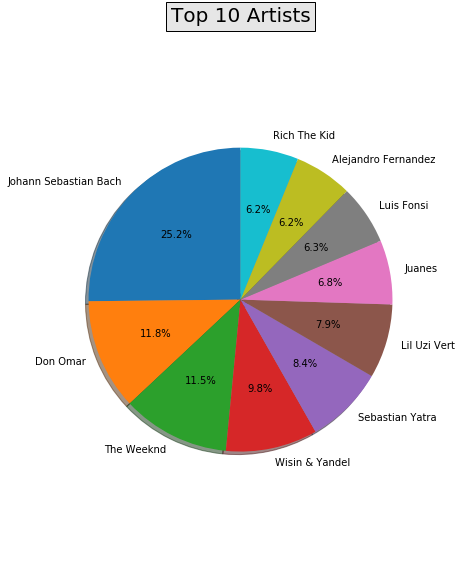

In [8]:
figureObject, axesObject = plt.subplots(figsize = (6,10))

name = simplified_data['artist_name'].value_counts()[:10]
label = name.index

# Draw the pie chart
axesObject.pie(name, labels = label, autopct='%1.1f%%', startangle=90, shadow = True)

# Aspect ratio - equal means pie is a circle
axesObject.axis('equal')

plt.title("Top 10 Artists",bbox={'facecolor':'0.9', 'pad':5}, fontsize = 20)

plt.show()

**<font color = "Purple">It is very clear from the pie chart that Johann Sebastian Bach has the most number of songs out of the total present in the data and Rich The Kid and Alejandro Fernandez have the least number of songs.</font>**

## Further data extraction to analyse audio features of tracks for different popular artists

###  <font color = 'Red' >Selecting top 50 artists </font>

Analysing music for the top 50 artists from the simplified data i.e. sorted based on the popularity of their tracks.

In [72]:
# taking only the unique artists from the data

artists = simplified_data['artist_name'].unique()

'''Sliced from 0-65 as we had to drop some of the artists because the track ids for such artists were missing 
   in the playlist content which is extracted further.'''

artists1 = list(artists[:66])

# dropping these artists because they had track ids missing in the playlist data fetched.

drop_artists = ['Eminem','Billie Eilish','Halsey','Dua Lipa','DripReport','Niall Horan','ITZY','Mac Miller','Alicia Keys',
               'Gunna','Jeremy Zucker','Bankrol Hayden','The Kid LAROI','5 Seconds of Summer','Nea','Lil Nas X']

# Created a list of top_artists from artists1 list by dropping the artists in the drop_artists list.

top_artists = [artist for artist in artists1 if artist not in drop_artists ]


print(top_artists)

['Powfu', 'Future', 'Bad Bunny', 'Lil Mosey', 'Justin Bieber', 'The Weeknd', 'Lady Gaga', 'J Balvin', 'Jonas Brothers', 'Shakira', 'Selena Gomez', 'Khalid', 'Sam Smith', 'Lil Uzi Vert', 'Doja Cat', 'BTS', 'Demi Lovato', 'Robin Schulz', 'A Boogie Wit da Hoodie', 'G-Eazy', 'YNW Melly', 'blackbear', 'Joji', 'Lauv', 'Lil Baby', 'Tory Lanez', 'Bazzi', 'Don Toliver', 'Joel Corry', 'Migos', 'Tones And I', 'Pop Smoke', 'Lil Wayne', 'Nicki Minaj', 'Swae Lee', 'Aitch', 'Lil Skies', 'Russ', 'Mabel', 'NLE Choppa', 'Ava Max', 'Hailee Steinfeld', 'Katy Perry', 'OneRepublic', 'Tame Impala', 'H.E.R.', 'Madison Beer', 'Stunna 4 Vegas', 'The Pussycat Dolls', 'Becky Hill']


### Creating a dataframe to store the audio features of the tracks 

In [77]:
features = pd.DataFrame(columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'])

In [20]:
print('\nSearching for playlists...\n\n')



Searching for playlists...




**Spotify provides a feature of "This is" playlist each one dedicated to a legendary artist.**


**The function playlist_search searches for the playlist id in the "This is" playlist data retrieved for each of the artists in the list of top_artists.**

In [26]:
def playlist_search(res, query):
    if str.lower(res['playlists']['items'][0]['name']) == str.lower(query) and res['playlists']['items'][0]['owner']['id'] == 'spotify':
        playlist_id = res['playlists']['items'][0]['id']
        print("Found playlist - " + query)
        return playlist_id
    else:
        print("Playlist not found for " + (str(top_artists[i])), end='\n')


**Here, I induvidually searched for each artist in my list, extracted the unique URI of the "This Is" playlist. With each ID, I obtained a list of all the tracks in the playlist and extracted the audio features for each track using the Spotify API methods. Now, after extracting the features for each track, I calculated their mean to get a summary for each artist. This mean summary of all features was saved to a csv.**

In [78]:
for i in range(len(top_artists)):    
    
    #list to store the track Ids
    track_ids = []
    squery = "This Is " + top_artists[i]
    
    # Searching Spotify for This Is playlist of the artist
    search_res = sp.search(squery, type="playlist")   
    
    # Searching for the playlist_id 
    playlist_id = playlist_search(search_res, squery)   
    
    # Get tracks info from the playlist_id
    playlist_content = sp.user_playlist_tracks('spotify', playlist_id = playlist_id)  
    
    # Looping through the track items and extracting the track_ids for the tracks
    for j, t in enumerate(playlist_content['items']):   
        track_ids.append(t['track']['id'])
    
    # Getting audio features from track_ids
    audio_feature = sp.audio_features(tracks=track_ids) 
    
    # Insert into dataframe
    audio = pd.DataFrame(data=audio_feature)    
    
    # Taking the mean of all features of 'This Is artist' tracks to get a summary of artist
    audio_mean = audio.mean()   
    
    # Append all summaries of artists to single dataframe
    features = pd.DataFrame.append(features, audio_mean, ignore_index=True)     
    print("#%d. Audio features for %s extracted.\n" %(i+1,top_artists[i]))

Found playlist - This Is Powfu
#1. Audio features for Powfu extracted.

Found playlist - This Is Future
#2. Audio features for Future extracted.

Found playlist - This Is Bad Bunny
#3. Audio features for Bad Bunny extracted.

Found playlist - This Is Lil Mosey
#4. Audio features for Lil Mosey extracted.

Found playlist - This Is Justin Bieber
#5. Audio features for Justin Bieber extracted.

Found playlist - This Is The Weeknd
#6. Audio features for The Weeknd extracted.

Found playlist - This Is Lady Gaga
#7. Audio features for Lady Gaga extracted.

Found playlist - This Is J Balvin
#8. Audio features for J Balvin extracted.

Found playlist - This Is Jonas Brothers
#9. Audio features for Jonas Brothers extracted.

Found playlist - This Is Shakira
#10. Audio features for Shakira extracted.

Found playlist - This Is Selena Gomez
#11. Audio features for Selena Gomez extracted.

Found playlist - This Is Khalid
#12. Audio features for Khalid extracted.

Found playlist - This Is Sam Smith
#1

In [79]:
features = features.set_index([top_artists])   # Set index of features from artists list


features.to_csv('audio_features.csv')    # Save dataframe to CSV to perform analysis in ipynb
print("\n\nData saved to audio_features.csv\n")




Data saved to audio_features.csv



##  Spotify Artists and Music Exploratory Data Analysis 

**We will be checking which artists rank higher or lower depending on the audio features of their most played tracks. The features for an artist are extracted by taking a mean of all features of songs in the 'This Is Artist' playlists made by Spotify.**

We will aim to find the following -

Which artists make music that is positive and uplifting?

Which artists you can effectively dance to?

Which artists depend on their music to be loud and energetic?

Which artists have more vocals in their music?


In [17]:
import seaborn as sns


sns.set(style='white',font='Lato', font_scale=1.1)
%matplotlib inline

In [10]:
df = pd.read_csv("audio_features.csv", index_col=0)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Powfu,0.704143,0.426762,5.714286,-10.465619,0.809524,0.100379,0.572357,0.004955,0.156131,0.377224,117.997643,181215.476190,4.000000
Future,0.789880,0.567060,4.320000,-6.824020,0.640000,0.202924,0.063944,0.023982,0.161828,0.318082,139.340300,204659.760000,3.980000
Bad Bunny,0.760402,0.670927,5.085366,-5.558720,0.475610,0.131293,0.262518,0.000198,0.156089,0.521634,121.783622,233369.634146,3.975610
Lil Mosey,0.734400,0.622000,5.333333,-7.211067,0.600000,0.074893,0.277887,0.000002,0.138913,0.498000,111.756600,160555.400000,4.000000
Justin Bieber,0.649159,0.639825,5.079365,-5.936381,0.492063,0.085248,0.219575,0.000186,0.160621,0.573189,118.942714,213012.920635,3.952381


##  Data pre-processing 

#### <font color = 'Red' >[1] Dropping the columns </font>

Some columns like key, mode and time_signature need to have integer values rather than floats. This will be inaccurate after taking mean of all the songs. Therefore, we will drop these and proceed with the analysis.

In [11]:
df.drop(columns=['key','mode','time_signature'], inplace=True)
df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
Powfu,0.704143,0.426762,-10.465619,0.100379,0.572357,0.004955,0.156131,0.377224,117.997643,181215.476190
Future,0.789880,0.567060,-6.824020,0.202924,0.063944,0.023982,0.161828,0.318082,139.340300,204659.760000
Bad Bunny,0.760402,0.670927,-5.558720,0.131293,0.262518,0.000198,0.156089,0.521634,121.783622,233369.634146
Lil Mosey,0.734400,0.622000,-7.211067,0.074893,0.277887,0.000002,0.138913,0.498000,111.756600,160555.400000
Justin Bieber,0.649159,0.639825,-5.936381,0.085248,0.219575,0.000186,0.160621,0.573189,118.942714,213012.920635


In [12]:
df.shape

(50, 10)

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Powfu to Becky Hill
Data columns (total 10 columns):
danceability        50 non-null float64
energy              50 non-null float64
loudness            50 non-null float64
speechiness         50 non-null float64
acousticness        50 non-null float64
instrumentalness    50 non-null float64
liveness            50 non-null float64
valence             50 non-null float64
tempo               50 non-null float64
duration_ms         50 non-null float64
dtypes: float64(10)
memory usage: 4.3+ KB
None


In [14]:
print(df.describe())

       danceability     energy   loudness  speechiness  acousticness  \
count     50.000000  50.000000  50.000000    50.000000     50.000000   
mean       0.685533   0.633353  -6.457657     0.137947      0.212624   
std        0.077440   0.088279   1.160731     0.078997      0.126476   
min        0.504130   0.422500 -10.465619     0.051749      0.012755   
25%        0.632294   0.592441  -7.108072     0.076152      0.134426   
50%        0.691983   0.645660  -6.166206     0.108304      0.180627   
75%        0.736414   0.687357  -5.615834     0.203347      0.247009   
max        0.858129   0.790750  -4.620375     0.353516      0.574750   

       instrumentalness   liveness    valence       tempo    duration_ms  
count      5.000000e+01  50.000000  50.000000   50.000000      50.000000  
mean       1.826055e-02   0.169456   0.473108  122.236716  208518.420179  
std        5.487427e-02   0.028699   0.090559    7.779257   24988.157902  
min        7.059016e-07   0.114982   0.318082   98.

#### <font color = 'Red' >[2] Checking to see if the Spotify API produced any NA or null values</font>

In [15]:
df.isna().sum()

danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

***There are no missing values in the data. Therefore, we will proceed with the analysis.***

##  Artists Analysis 



### *Danceability*

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

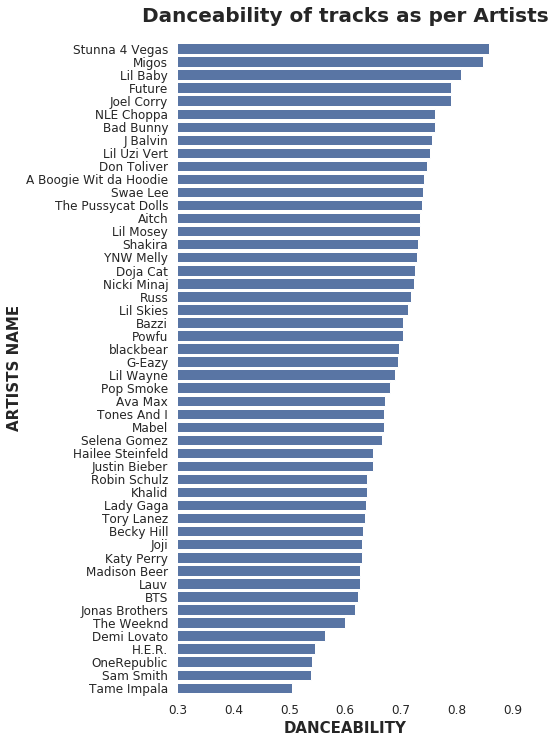

In [18]:
fig = plt.figure(figsize=(6,12))
dance = df.danceability.sort_values(ascending = False)
sns.barplot(x = dance, y = dance.index, color ='b')

plt.xlabel('DANCEABILITY', fontdict={'weight':'bold', 'size':'15'})
plt.ylabel('ARTISTS NAME', fontdict={'weight':'bold', 'size':'15'})
plt.title("Danceability of tracks as per Artists", fontsize = 20, pad =20, fontweight = 'bold')
plt.xlim(0.3,0.9)

sns.despine(left=True, bottom=True)

**<font color='Purple'>
Surprisingly, rappers and bands have comparitively more tracks that people can dance to. Stunna 4 Vegas, Migos and Lil Baby  top the list whereas, artists like Sam Smith and Tame Impala are at the bottom. So we can conclude that, people find it easier to dance to Stunna 4 Vegas but harder to dance to Sam Smith and Tame Impala.</font>**

### *Energy*

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

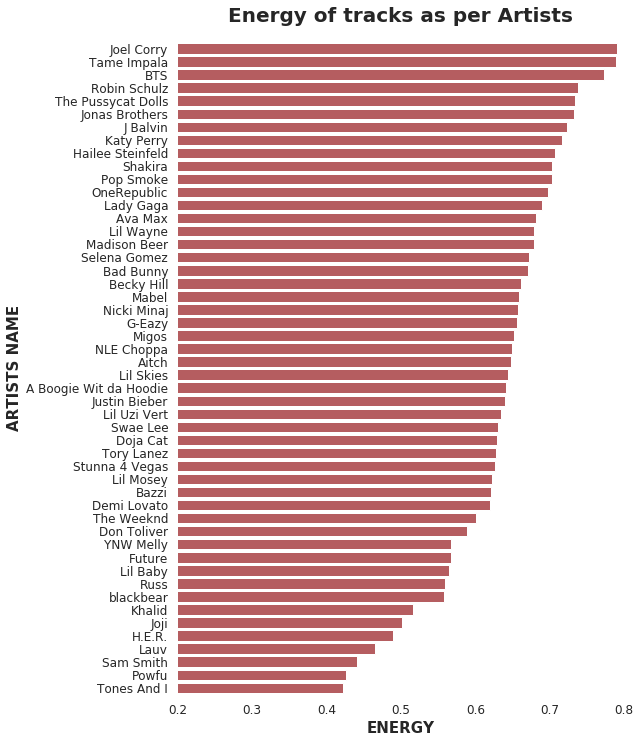

In [19]:
fig2 = plt.figure(figsize=(8,12))
energy = df.energy.sort_values(ascending=False)
sns.barplot(x = energy,y = energy.index, color ='r')

plt.xlabel('ENERGY', fontdict={'weight':'bold', 'size':'15'})
plt.ylabel('ARTISTS NAME', fontdict={'weight':'bold', 'size':'15'})
plt.title("Energy of tracks as per Artists", fontsize = 20, pad =20, fontweight = 'bold')
plt.xlim(0.2,0.8)

sns.despine(left=True, bottom=True)

**<font color='Purple'>When it comes to Energy, we can expect some DJ and hip hop bands artists at the top. Joel Corry, Tame Impala and BTS have high energy as compared to Powfu and Tones And I who have songs that are soft and slow.</font>**

**<font color='Purple'>
It's fascinating how Tame Impala and BTS have tracks that aren't suitable to dance to, but at the same time, fast, energetic and loud.</font>**

### *Valence*

Now, Valence is very interesting. It's a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

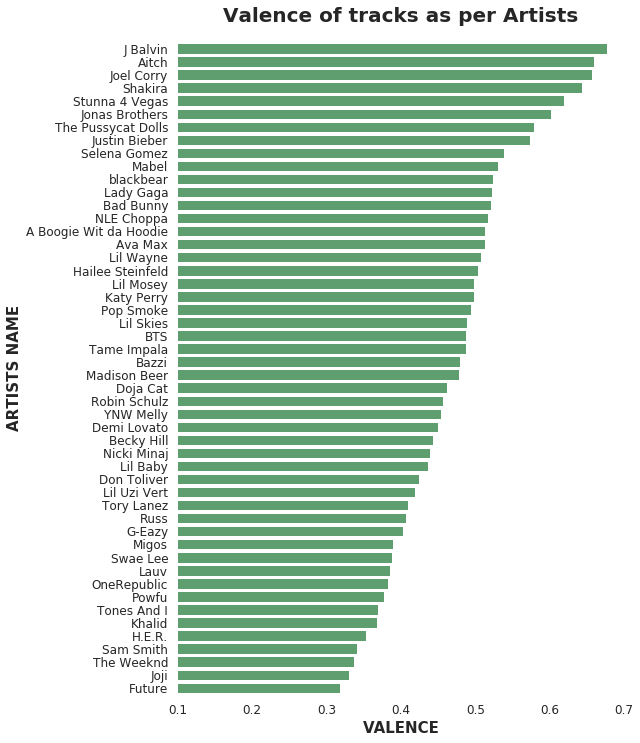

In [20]:
fig3 = plt.figure(figsize = (8,12))
valence = df.valence.sort_values(ascending=False)
sns.barplot(x = valence,y = valence.index, color ='g')

plt.xlabel('VALENCE', fontdict={'weight':'bold','size':'15'})
plt.ylabel('ARTISTS NAME', fontdict={'weight':'bold', 'size':'15'})
plt.title("Valence of tracks as per Artists", fontsize = 20, pad =20, fontweight = 'bold')
plt.xlim(0.1,0.7)

sns.despine(left=True, bottom=True)

**<font color = 'Purple'>For valence, we see that J Balvin and Aitch are among the artists at the top whereas, Joji and Future are at the bottom. If you've been listening to Future and you fancy him, this is indeed very unsettling.</font>**

**<font color = 'Purple'>
So next time you feel low, turn up the volume to some J Balvin or Aitch tracks and just feel the vibe!</font>**

### *Loudness*
Loudness represents the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 

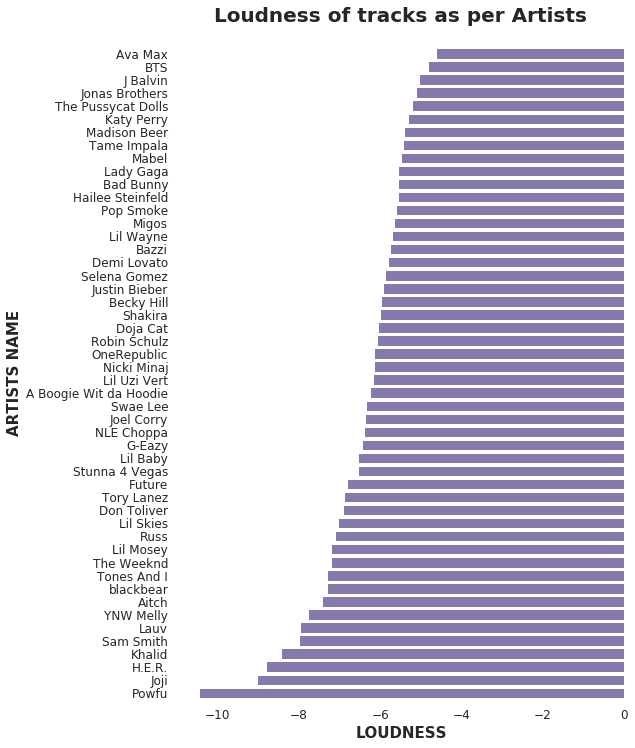

In [21]:
fig4 = plt.figure(figsize=(8,12))
loud = df.loudness.sort_values(ascending=False)

sns.barplot(x = loud,y = loud.index, color ='m')
plt.xlabel('LOUDNESS', fontdict={'weight':'bold', 'size':'15'})
plt.ylabel('ARTISTS NAME', fontdict={'weight':'bold', 'size':'15'})
plt.title("Loudness of tracks as per Artists", fontsize = 20, pad =25, fontweight = 'bold')

sns.despine(left=True, bottom=True)

**<font color = 'Purple'>When it comes to loudness, we think of Hip-hop and Rock artists. Here, as we can see Ava Max, BTS and J Balvin tops the list. At the bottom of the list, we see artists that produce music that is softer and more quiet like Joji and Powfu.</font>**

### *Speechiness*

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

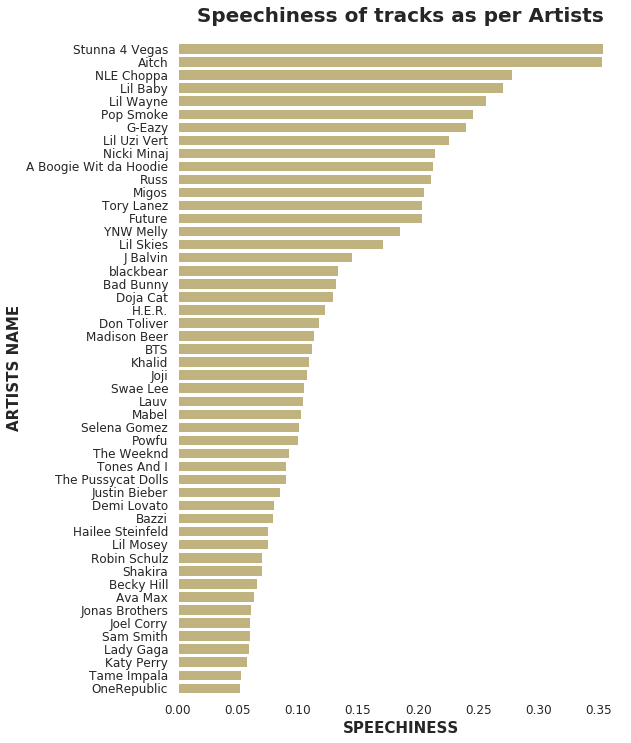

In [22]:
fig5 = plt.figure(figsize=(8,12))
speech = df.speechiness.sort_values(ascending=False)

sns.barplot(x = speech,y = speech.index, color ='y')
plt.xlabel('SPEECHINESS', fontdict={'weight':'bold', 'size':'15'})
plt.ylabel('ARTISTS NAME', fontdict={'weight':'bold', 'size':'15'})
plt.title("Speechiness of tracks as per Artists", fontsize = 20, pad =20, fontweight = 'bold')

sns.despine(left=True, bottom=True)

**<font color ='Purple'>Speechiness, as we can presume is the highest in rap. As we can see Stunna 4 Vegas and Aitch top this one, whereas artist like Tame Impala and OneRepublic have less speech-like tracks and are more layered with dense music.</font>**

### *TEMPO*

Tempo is the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

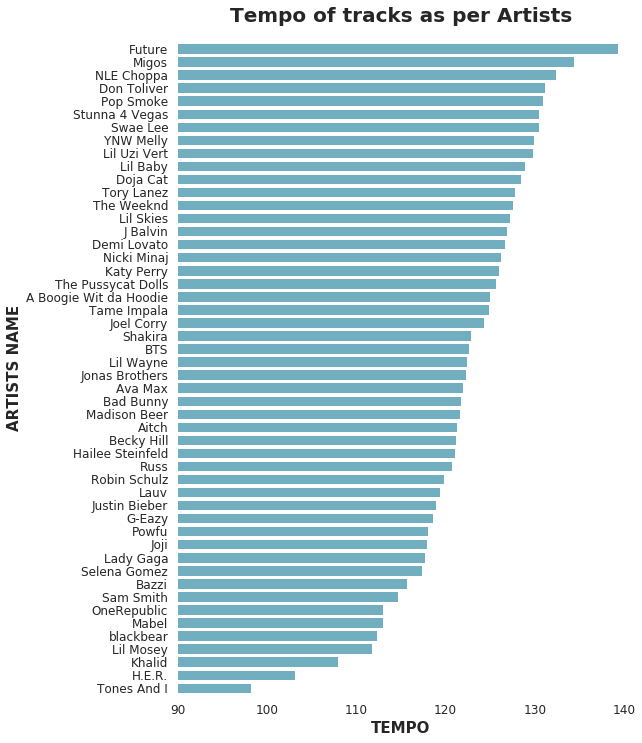

In [23]:
fig6 = plt.figure(figsize = (8,12))
tempo = df.tempo.sort_values(ascending=False)
sns.barplot(x=tempo,y=tempo.index,color='c')

plt.xlabel('TEMPO', fontdict={'weight':'bold', 'size':'15'})
plt.ylabel('ARTISTS NAME', fontdict={'weight':'bold', 'size':'15'})
plt.title("Tempo of tracks as per Artists", fontsize = 20, pad =20, fontweight = 'bold')
plt.xlim(90,140)

sns.despine(left=True, bottom=True)

**<font color = 'Purple'>Tempo, also called rhythm or pulse is a very important trait of any track. Tempo defines the beat of the music and influences a lot of factors. Rappers usually have a high tempo which is very clear from the plot as we can see rappers like Future, Migos or NLE Choppa are at the  top.</font>**


##  Conclusion 

We conclude our analysis of the Spotify Artists dataset, figuring out what music people love and hate depending on the traits and various qualities associated with each track has been really enthralling.

After this analysis we will be able to properly select the artists and their tracks for a proper setting i.e. if we are in a dancing mood or if we want to uplift our mood, we know which artists we should listen to.



##  Future Enhancements

[1] We could further extended our analysis to check what kind of artist is popular in which region and find out what kind of music people like in different parts of the world and accordingly we could segregate the artists and their tracks.

[2] We could analyse a particular user's playlist to check what kind of genre songs user listens to and what are the most played songs.

[3] we could also analyse which genre is the most popular on spotify.

##  References 

[1] https://developer.spotify.com/

[2] https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

[3] https://medium.com/@maxtingle/getting-started-with-spotifys-api-spotipy-197c3dc6353b

[4] https://medium.com/@RareLoot/extracting-spotify-data-on-your-favourite-artist-via-python-d58bc92a4330

